<h1>Load yours data</h1>

In [5]:
# -- Import --
import pandas as pd
import ta
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import clear_output
from math import *
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import sys
import ccxt
sys.path.append( '../../utilities' )
from data_engine import DataEngine

# -- You can change the crypto pair ,the start date and the time interval below --
pair = 'BNB/USDT'
timeframe = '1h'
startDate = '2017-01-01T00:00:00'

dataEngine = DataEngine(session=ccxt.binance(), path_to_data='../database/')

df = dataEngine.get_historical_from_db(pair, timeframe, startDate)

print("Data loaded 100%")

# -- Uncomment the line below if you want to check your price dataset --
# df

Successfully load 37722 candles for BNBUSDT
Data loaded 100%


<h1>Define your indicators</h1>

In [9]:
# -- Indicator variable --
trixLength = 8
trixSignal = 21
stochWindow = 14

# -- Drop all columns we do not need --
df.drop(columns=df.columns.difference(['open','high','low','close','volume']), inplace=True)

# -- Indicators, you can edit every value --
df['TRIX'] = ta.trend.ema_indicator(ta.trend.ema_indicator(ta.trend.ema_indicator(close=df['close'], window=trixLength), window=trixLength), window=trixLength)
df['TRIX_PCT'] = df["TRIX"].pct_change()*100
df['TRIX_SIGNAL'] = ta.trend.sma_indicator(df['TRIX_PCT'], trixSignal)
df['TRIX_HISTO'] = df['TRIX_PCT'] - df['TRIX_SIGNAL']
df['STOCH_RSI'] = ta.momentum.stochrsi(close=df['close'], window=14, smooth1=3, smooth2=3)


print("Indicators loaded 100%")
df

Indicators loaded 100%


,open,high,low,close,volume,TRIX,TRIX_PCT,TRIX_SIGNAL,TRIX_HISTO,STOCH_RSI
timestamp,,,,,,,,,,
2017-11-06 03:00:00,1.5000,1.7990,0.5000,1.7000,649.120,NaN,NaN,NaN,NaN,NaN
2017-11-06 04:00:00,1.3000,1.6500,1.3000,1.6479,8147.720,NaN,NaN,NaN,NaN,NaN
2017-11-06 05:00:00,1.5457,1.5525,1.5455,1.5458,6628.200,NaN,NaN,NaN,NaN,NaN
2017-11-06 06:00:00,1.5458,1.6810,1.5387,1.6810,22767.900,NaN,NaN,NaN,NaN,NaN
2017-11-06 07:00:00,1.6809,1.6809,1.6000,1.6250,14938.730,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2022-03-01 15:00:00,404.3000,407.4000,400.5000,404.6000,62624.178,400.636213,0.297146,0.405896,-0.108750,0.012423
2022-03-01 16:00:00,404.7000,407.9000,400.7000,401.8000,47663.149,401.593187,0.238864,0.401531,-0.162667,0.000000
2022-03-01 17:00:00,401.8000,404.8000,400.2000,403.6000,33953.992,402.343209,0.186761,0.393377,-0.206616,0.056831


<h1>Overbought optimizer</h1>

Loading... 42 / 42


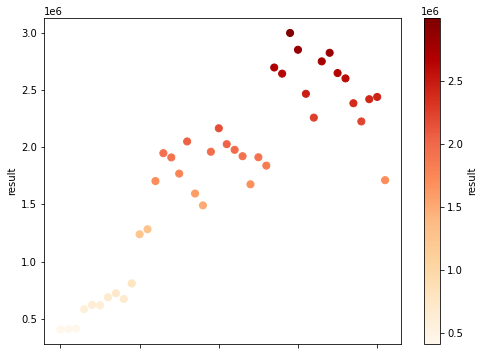

    param1        result
0     60.0  4.063209e+05
1     61.0  4.103541e+05
2     62.0  4.129875e+05
3     63.0  5.842611e+05
5     65.0  6.174205e+05
4     64.0  6.223529e+05
8     68.0  6.727419e+05
6     66.0  6.872698e+05
7     67.0  7.225713e+05
9     69.0  8.090202e+05
10    70.0  1.238527e+06
11    71.0  1.282532e+06
18    78.0  1.491097e+06
17    77.0  1.594783e+06
24    84.0  1.675249e+06
12    72.0  1.703657e+06
41   101.0  1.711292e+06
15    75.0  1.768825e+06
26    86.0  1.838815e+06
14    74.0  1.910231e+06
25    85.0  1.911823e+06
23    83.0  1.921023e+06
13    73.0  1.947401e+06
19    79.0  1.959960e+06
22    82.0  1.976771e+06
21    81.0  2.026348e+06
16    76.0  2.049981e+06
20    80.0  2.165284e+06
38    98.0  2.224846e+06
32    92.0  2.258124e+06
37    97.0  2.383961e+06
39    99.0  2.419367e+06
40   100.0  2.439027e+06
31    91.0  2.466535e+06
36    96.0  2.601241e+06
28    88.0  2.642654e+06
35    95.0  2.647958e+06
27    87.0  2.696237e+06
33    93.0  2.749932e+06


In [7]:
dfTest = None
dt = None
dt = pd.DataFrame(columns = ['param1', 'result'])

# dfTest = df.copy()

# -- If you want to run your BackTest on a specific period, uncomment the line below --
dfTest = df[:]

# -- Condition to BUY market --
def buyCondition(row, stochOverBought):
  if row['TRIX_HISTO'] >= 0 and row['STOCH_RSI'] < stochOverBought:
    return True
  else:
    return False

# -- Condition to SELL market --  
def sellCondition(row):
  if row['TRIX_HISTO'] < 0:
        return True
  else:
        return False

loopI = [60, 102, 1]
enumI = ceil((loopI[1] - loopI[0]) / loopI[2])

count = 0
maxCount = enumI
for i in range(loopI[0], loopI[1], loopI[2]):
  count += 1
  clear_output(wait=True)
  print("Loading...",count,'/',maxCount)
  # -- You can change variables below --
  usdt = 1000
  coin = 0

  stochTop = i / 100

  previousRow = dfTest.iloc[0]

  for index, row in dfTest.iterrows():
    #BUY
    if buyCondition(row, stochTop) and usdt > 0:
      coin = (usdt/row['close']) - 0.0007 * (usdt/row['close'])
      usdt = 0

    #SELL
    elif sellCondition(row) and coin > 0:
      usdt = coin * row['close'] - (0.0007 * coin * row['close'])
      coin = 0

  myrow = {'param1': i,'result': coin * dfTest.iloc[len(dfTest)-1]['close'] + usdt}
  dt = dt.append(myrow,ignore_index=True)   

dt.plot.scatter(x='param1',y=1,c='result',s=50,colormap='OrRd',figsize=(8,6))

plt.show()

print(dt.sort_values(by=['result']))

<h2>Trix Parameters Optimizer</h2>

Loading... 260 / 260


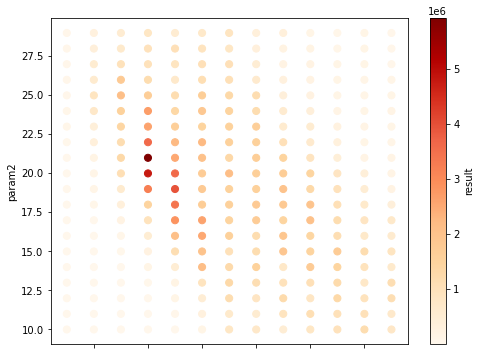

    param1  param2        result
0      5.0    10.0  3.030839e+01
1      5.0    11.0  4.047039e+01
2      5.0    12.0  6.732074e+01
3      5.0    13.0  9.186082e+01
20     6.0    10.0  1.234913e+02
..     ...     ...           ...
90     9.0    20.0  3.591717e+06
72     8.0    22.0  3.605435e+06
89     9.0    19.0  3.953058e+06
70     8.0    20.0  4.764677e+06
71     8.0    21.0  5.918410e+06

[260 rows x 3 columns]


In [8]:
dfTest = None
dt = None
dt = pd.DataFrame(columns = ['param1','param2', 'result'])

# dfTest = df.copy()

# -- If you want to run your BackTest on a specific period, uncomment the line below --
dfTest = df[:]

# -- Condition to BUY market --
def buyCondition(row, stochOverBought):
  if row['TRIX_HISTO'] >= 0 and row['STOCH_RSI'] < stochOverBought:
    return True
  else:
    return False

# -- Condition to SELL market --  
def sellCondition(row):
  if row['TRIX_HISTO'] < 0:
        return True
  else:
        return False

loopI = [5, 18, 1]
enumI = ceil((loopI[1] - loopI[0]) / loopI[2])

loopJ = [10, 30, 1]
enumJ = ceil((loopJ[1] - loopJ[0]) / loopJ[2])

count = 0
maxCount = enumI * enumJ
for i in range(loopI[0], loopI[1], loopI[2]):
  for j in range(loopJ[0], loopJ[1], loopJ[2]):
    count += 1
    clear_output(wait=True)
    print("Loading...",count,'/',maxCount)
    # -- You can change variables below --
    usdt = 1000
    coin = 0

    trixLength = i
    trixSignal = j
    # -- Indicators, you can edit every value --
    dfTest['TRIX'] = ta.trend.ema_indicator(ta.trend.ema_indicator(ta.trend.ema_indicator(close=dfTest['close'], window=trixLength), window=trixLength), window=trixLength)
    dfTest['TRIX_PCT'] = dfTest["TRIX"].pct_change()*100
    dfTest['TRIX_SIGNAL'] = ta.trend.sma_indicator(dfTest['TRIX_PCT'], trixSignal)
    dfTest['TRIX_HISTO'] = dfTest['TRIX_PCT'] - dfTest['TRIX_SIGNAL']

    stochTop = 0.90

    previousRow = dfTest.iloc[0]

    for index, row in dfTest.iterrows():
      #BUY
      if buyCondition(row, stochTop) and usdt > 0:
        coin = (usdt/row['close']) - 0.0007 * (usdt/row['close'])
        usdt = 0

      #SELL
      elif sellCondition(row) and coin > 0:
        usdt = coin * row['close'] - (0.0007 * coin * row['close'])
        coin = 0

    myrow = {'param1': i, 'param2': j,'result': coin * dfTest.iloc[len(dfTest)-1]['close'] + usdt}
    dt = dt.append(myrow,ignore_index=True)   

dt.plot.scatter(x='param1',y='param2',c='result',s=50,colormap='OrRd',figsize=(8,6))
plt.show()

print(dt.sort_values(by=['result']))

<h1>Stock RSI Optimizer</h1>

Loading... 29 / 29


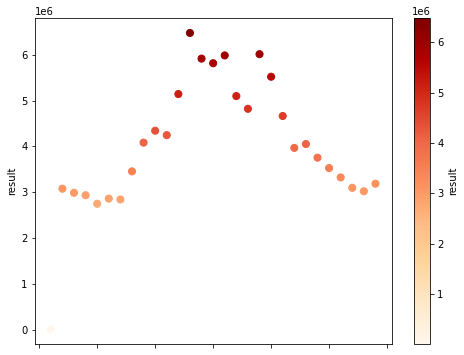

    param1        result
0      1.0  1.000000e+03
4      5.0  2.747594e+06
6      7.0  2.841399e+06
5      6.0  2.860057e+06
3      4.0  2.933889e+06
2      3.0  2.987825e+06
27    28.0  3.021039e+06
1      2.0  3.076479e+06
26    27.0  3.095808e+06
28    29.0  3.185775e+06
25    26.0  3.323406e+06
7      8.0  3.455407e+06
24    25.0  3.527391e+06
23    24.0  3.754517e+06
21    22.0  3.968287e+06
22    23.0  4.052361e+06
8      9.0  4.083223e+06
10    11.0  4.246769e+06
9     10.0  4.343365e+06
20    21.0  4.664455e+06
17    18.0  4.822204e+06
16    17.0  5.100209e+06
11    12.0  5.144593e+06
19    20.0  5.522839e+06
14    15.0  5.818065e+06
13    14.0  5.918410e+06
15    16.0  5.988253e+06
18    19.0  6.015500e+06
12    13.0  6.478948e+06


In [10]:
dfTest = None
dt = None
dt = pd.DataFrame(columns = ['param1', 'result'])

# dfTest = df.copy()

# -- If you want to run your BackTest on a specific period, uncomment the line below --
dfTest = df[:]

# -- Condition to BUY market --
def buyCondition(row, stochOverBought):
  if row['TRIX_HISTO'] >= 0 and row['STOCH_RSI'] < stochOverBought:
    return True
  else:
    return False

# -- Condition to SELL market --  
def sellCondition(row):
  if row['TRIX_HISTO'] < 0:
        return True
  else:
        return False

loopI = [1, 30, 1]
enumI = ceil((loopI[1] - loopI[0]) / loopI[2])

count = 0
maxCount = enumI
for i in range(loopI[0], loopI[1], loopI[2]):
    count += 1
    clear_output(wait=True)
    print("Loading...",count,'/',maxCount)
    # -- You can change variables below --
    usdt = 1000
    coin = 0

    dfTest['STOCH_RSI'] = ta.momentum.stochrsi(close=dfTest['close'], window=i, smooth1=3, smooth2=3)

    stochTop = 0.90

    previousRow = dfTest.iloc[0]

    for index, row in dfTest.iterrows():
      #BUY
      if buyCondition(row, stochTop) and usdt > 0:
        coin = (usdt/row['close']) - 0.0007 * (usdt/row['close'])
        usdt = 0

      #SELL
      elif sellCondition(row) and coin > 0:
        usdt = coin * row['close'] - (0.0007 * coin * row['close'])
        coin = 0

    myrow = {'param1': i,'result': coin * dfTest.iloc[len(dfTest)-1]['close'] + usdt}
    dt = dt.append(myrow,ignore_index=True)   

dt.plot.scatter(x='param1',y=1,c='result',s=50,colormap='OrRd',figsize=(8,6))

plt.show()

print(dt.sort_values(by=['result']))